In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
# loading the raw data

path = '/content/drive/MyDrive/reaaal/1.04. Real-life example.csv'
raw = pd.read_csv(path)
raw

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [ ]:
# looking at the columns we'll be working with

raw.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [ ]:
# looking at how many car brands we have

raw['Brand'].nunique()

7

In [ ]:
# looking at how many cars are in each brand

raw['Brand'].value_counts()

Brand
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: count, dtype: int64

In [ ]:
# looking at the engine types that we have

raw['Engine Type'].value_counts()

Engine Type
Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: count, dtype: int64

In [ ]:
# figuring out the data types of our columns

raw.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [ ]:
# looking at the descriptive statistics of our columns

raw.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
# determining variables of interest
# we can choose to drop some columns

dd = raw.drop(['Model'], axis=1)
dd.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
# lets deal with missing values
# we can choose to sum them for a better understanding

dd.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
# we can simply drop the missing values(bout 5%) which is okay
# then check the descriptive statistics without the missing values

drop  = dd.dropna(axis=0)
drop.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


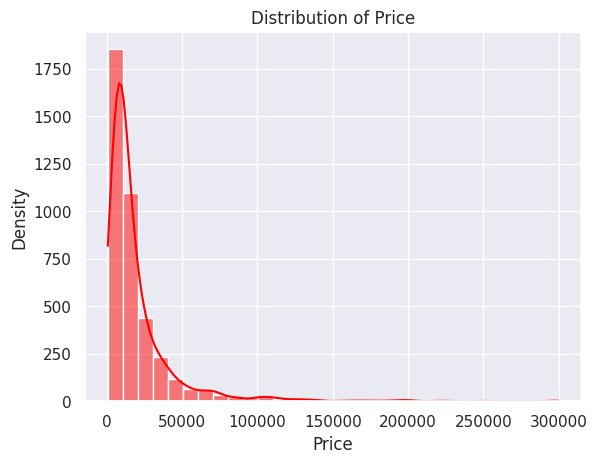

In [ ]:
# looking at the PDF of certain columns
# this is to show us how the variable is distributed

sns.histplot(drop['Price'], bins=30, kde=True, color='red')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Price')
plt.show()

In [ ]:
drop['Price'].max()

300000.0

In [ ]:
# Obviously there are outliers in our data
# we can declare a variable that is equal to the 99th percentile
# we can create a dataframe that al prices must be below this value

q = drop['Price'].quantile(0.99)
qq =drop[drop['Price']<q]


# checking the descriptive stats
qq.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


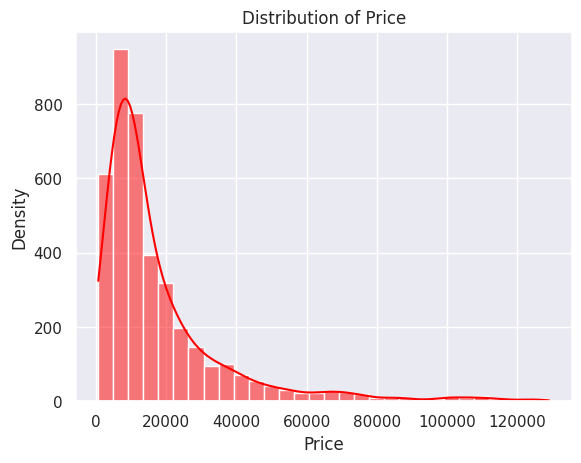

In [ ]:
# checking the PDF again with fewer outliers

sns.histplot(qq['Price'], bins=30, kde=True, color='red')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Price')
plt.show()

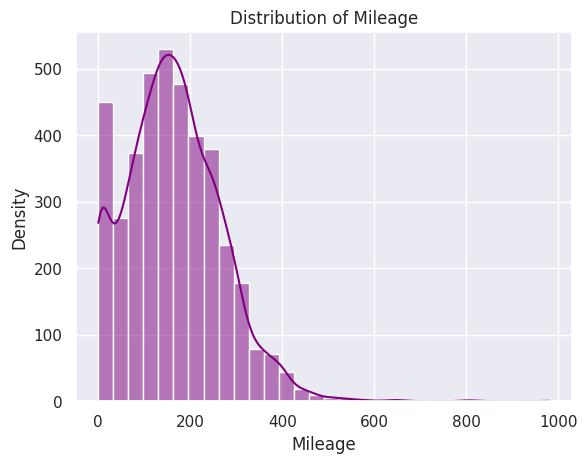

In [ ]:
# we can do the same to other numerical variables
# before the removal of outliers

sns.histplot(drop['Mileage'], bins=30, kde=True, color='purple')
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.title('Distribution of Mileage')
plt.show()

In [ ]:
# removing the outliers

t = qq['Mileage'].quantile(0.99)
tt = qq[qq['Mileage']<t]

tt.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


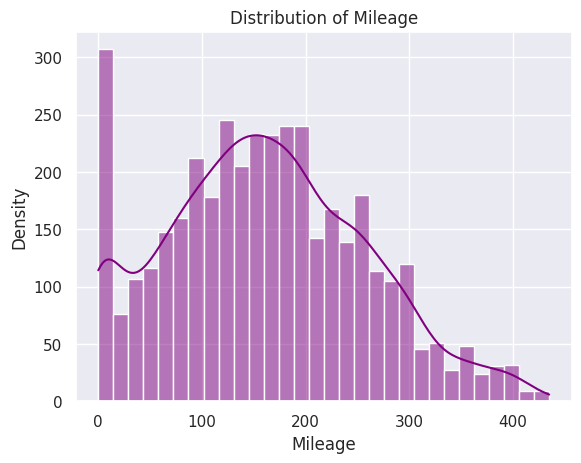

In [ ]:
# after the removal of outliers

sns.histplot(tt['Mileage'], bins=30, kde=True, color='purple')
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.title('Distribution of Mileage')
plt.show()

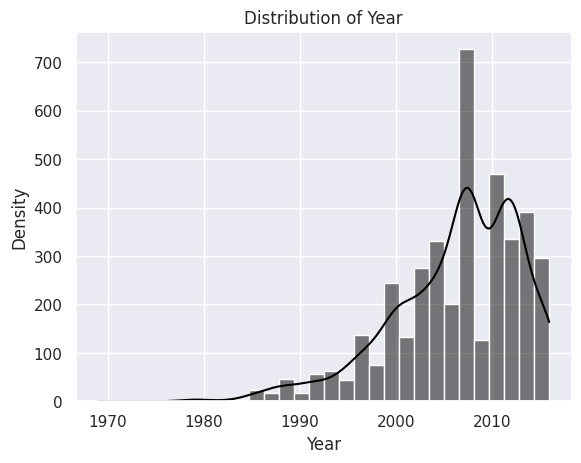

In [ ]:
# we can do the same for the variable year

sns.histplot(drop['Year'], bins=30, kde=True, color='black')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Year')
plt.show()

In [ ]:
# removing the outliers
# the outliers in this column are less though

y = tt['Year'].quantile(0.01)
yy = tt[tt['Year']>y]

yy.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3890,3890.000000,3890,3890.000000,3890.000000,3890,3890,3890.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1479,NaN,NaN,1814,3522,NaN
mean,NaN,18137.939874,NaN,160.753985,2.758735,NaN,NaN,2006.691774
std,NaN,19052.360866,NaN,95.595549,5.013666,NaN,NaN,6.107872
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


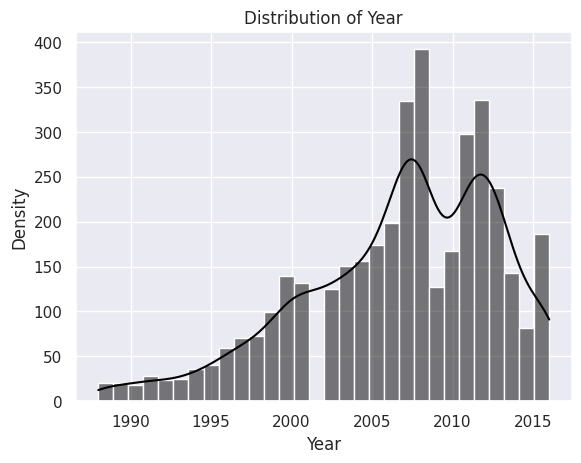

In [ ]:
# to visualize it

sns.histplot(yy['Year'], bins=30, kde=True, color='black')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Year')
plt.show()

In [ ]:
# resetting the index to reorganize the data
# then assign to a new variable

xx = yy.reset_index(drop=True)


# to check what's left
xx.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3890,3890.000000,3890,3890.000000,3890.000000,3890,3890,3890.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1479,NaN,NaN,1814,3522,NaN
mean,NaN,18137.939874,NaN,160.753985,2.758735,NaN,NaN,2006.691774
std,NaN,19052.360866,NaN,95.595549,5.013666,NaN,NaN,6.107872
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
xx.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3890.0,18137.939874,19052.360866,800.0,7200.00,11600.0,21537.5,129222.00
Mileage,3890.0,160.753985,95.595549,0.0,91.25,157.0,226.0,435.00
EngineV,3890.0,2.758735,5.013666,0.6,1.80,2.2,3.0,99.99
Year,3890.0,2006.691774,6.107872,1988.0,2003.00,2008.0,2012.0,2016.00


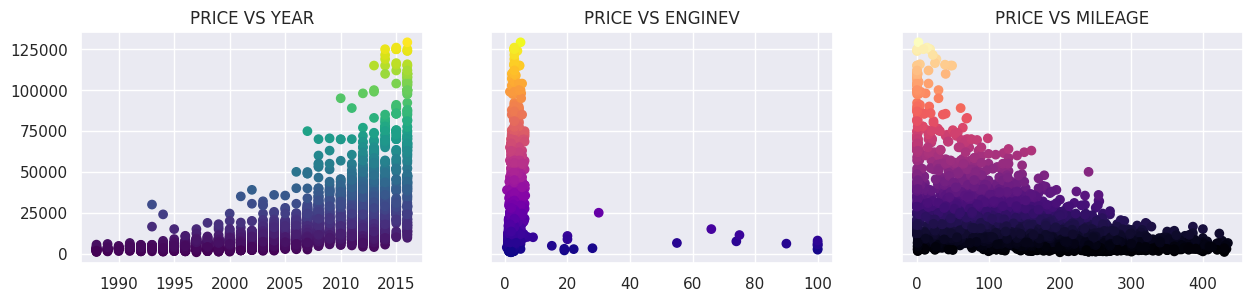

In [ ]:
# we can create scatterplots to check for relationships between our variables

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15, 3))

# scatterplot between Year and Price
ax1.scatter(xx['Year'], xx['Price'], c=xx['Price'], cmap='viridis')
ax1.set_title('PRICE VS YEAR')

# scatterplot between EngineV and Price

ax2.scatter(xx['EngineV'], xx['Price'], c=xx['Price'], cmap='plasma')
ax2.set_title('PRICE VS ENGINEV')

# scatterplot between Mileage and Price

ax3.scatter(xx['Mileage'], xx['Price'], c=xx['Price'], cmap='magma')
ax3.set_title('PRICE VS MILEAGE')

plt.show()

In [ ]:
# since price is an exponential variable we can use log transformation on it
log_price = np.log(xx['Price'])

# we can add it as a column to our dataset
xx['log_price'] = log_price
xx.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


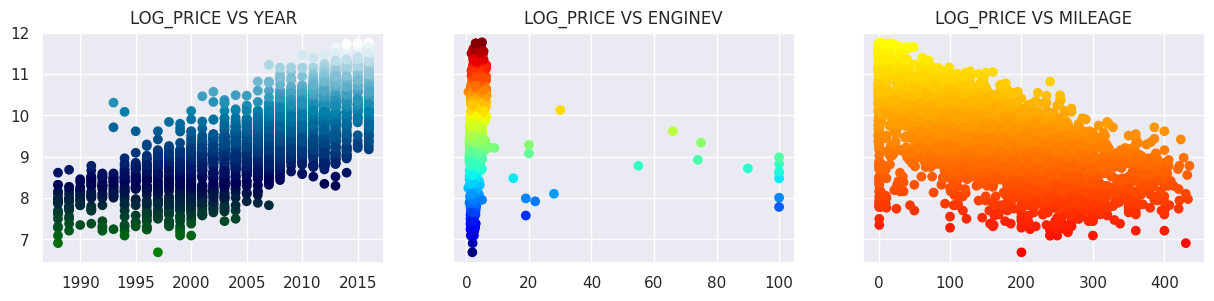

In [ ]:
# creating the scatterplots using the log_Price as our shared Y

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15, 3))

# scatterplot of log_price and year
ax1.scatter(xx['Year'], xx['log_price'], c=xx['log_price'], cmap='ocean')
ax1.set_title('LOG_PRICE VS YEAR')

# scatterplot of log_price and EngineV
ax2.scatter(xx['EngineV'], xx['log_price'], c=xx['log_price'], cmap='jet')
ax2.set_title('LOG_PRICE VS ENGINEV')

# scatterplot of log_price and Mileage
ax3.scatter(xx['Mileage'], xx['log_price'], c=xx['log_price'], cmap='autumn')
ax3.set_title('LOG_PRICE VS MILEAGE')

plt.show()

# we can clearly see a linear relationship

In [ ]:
# since we'll b using log_price we can drop the price column

xx = xx.drop(['Price'], axis=1)

xx.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

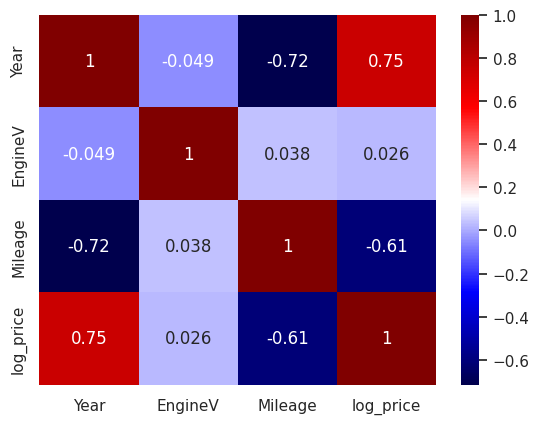

In [ ]:
# checking for multicollinearity in our numerical variables
# we can check the correlation matrix of the numerical variables

sns.heatmap(xx[['Year', 'EngineV', 'Mileage', 'log_price']].corr(), annot=True, cmap='seismic')
plt.show()



In [ ]:
# we can check for multicollinearity using the variance inflation factor as well

from statsmodels.stats.outliers_influence import variance_inflation_factor

# using only our numerical variables
var = xx[['Year', 'EngineV', 'Mileage']]

# creating a dataframe to include all the Vifs
vv = pd.DataFrame()

# looping through all the variables
vv['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]
# including names for clarity
vv['Features'] = var.columns

vv

,VIF,Features
0,4.035876,Year
1,1.304621,EngineV
2,3.806421,Mileage


In [ ]:
# year having the highest vif can be removed from the dataset
# thus driving the vifs of other variables down

datax = xx.drop(['Year'], axis=1)

In [ ]:
# creating dummy variables to handle the categorical variables

dums = pd.get_dummies(datax, drop_first=True).astype(int)
dums.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
dums.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
# we can arrange the data to have the dependent variables at the beginning

cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

dums = dums[cols]
dums.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
# to implement a linear regression model

# we the declare the target(dependent variable) and the inputs(all else apart fromt the target)

target = dums['log_price']
inputs = dums.drop(['log_price'], axis=1)

In [ ]:
# we then scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting the inputs
scaler.fit(inputs)

StandardScaler()

In [ ]:
# scaling the data to have consistent ranges

skl = scaler.transform(inputs)

In [ ]:
# creating a train test model
# import the module for the split
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(skl, target, test_size=0.2, random_state=42)

In [ ]:
# creating a regression object and fitting it

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# storing the outputs of the regression

yy = reg.predict(x_train)
yy

array([9.55702961, 7.04199742, 8.51709875, ..., 8.47353244, 9.80053291,
       9.38647105])

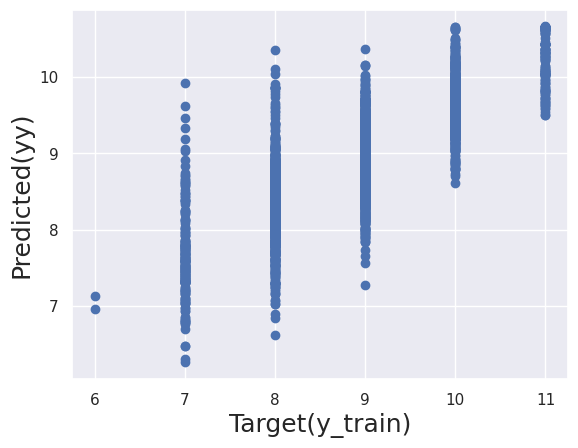

In [ ]:
# plotting a scatterplot to compare the yy values against the target

plt.scatter(y_train, yy)
plt.xlabel('Target(y_train)', size=18)
plt.ylabel('Predicted(yy)', size=18)

plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

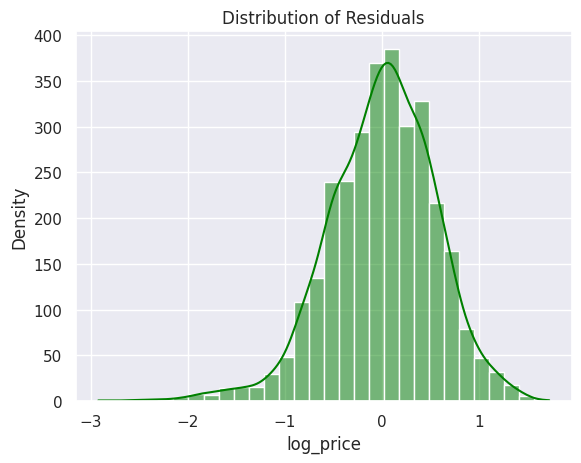

In [ ]:
# we can also plot the PDF of the residuals to check for anomalies

sns.histplot(y_train -yy, bins=30, kde=True, color='green')
plt.ylabel('Density')
plt.title('Distribution of Residuals')

In [ ]:
# finding the Rsquared of the model

reg.score(x_train, y_train)

0.6476899700372539

In [ ]:
# down to testing our model now
y_tst = reg.predict(x_test)

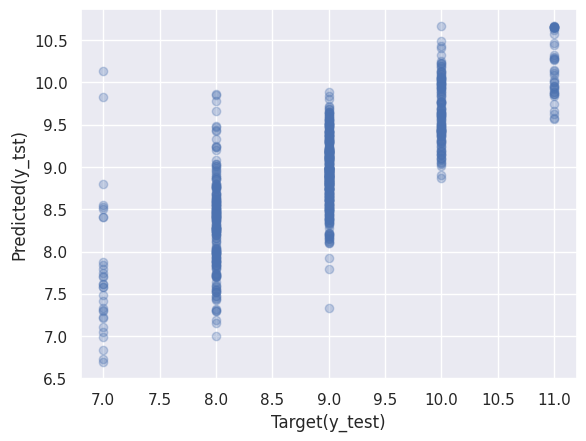

In [ ]:
# creating a scatterplt to visualise

plt.scatter(y_test, y_tst, alpha=0.3)
plt.xlabel('Target(y_test)')
plt.ylabel('Predicted(y_tst)')

plt.show()

In [ ]:
# to check our predictions
# we take th exponential of the log price

pp = pd.DataFrame(np.exp(y_tst), columns=['Predictions'])
pp

,Predictions
0,7534.815651
1,12456.484835
2,15542.077616
3,4738.662250
4,4476.539522
...,...
773,4423.185039
774,9482.333368
775,9887.122860
776,7791.053438


In [63]:
# including the test target for comparison

pp['Target'] = np.exp(y_test)
pp.head()

,Predictions,Target
0,7534.815651,2980.957987
1,12456.484835,NaN
2,15542.077616,NaN
3,4738.662250,NaN
4,4476.539522,NaN


In [64]:
# seeing that there are null values, we need to rest the index

y_test = y_test.reset_index(drop=True)
y_test.head()

0    9
1    9
2    9
3    8
4    9
Name: log_price, dtype: int64

In [65]:
# overwriting the previous values

pp['Target'] = np.exp(y_test)
pp.head()

,Predictions,Target
0,7534.815651,8103.083928
1,12456.484835,8103.083928
2,15542.077616,8103.083928
3,4738.662250,2980.957987
4,4476.539522,8103.083928


In [66]:
# getting the difference between the target and prediction

pp['Difference'] = pp['Target'] - pp['Predictions']
pp

,Predictions,Target,Difference
0,7534.815651,8103.083928,568.268277
1,12456.484835,8103.083928,-4353.400908
2,15542.077616,8103.083928,-7438.993688
3,4738.662250,2980.957987,-1757.704263
4,4476.539522,8103.083928,3626.544405
...,...,...,...
773,4423.185039,2980.957987,-1442.227052
774,9482.333368,22026.465795,12544.132427
775,9887.122860,22026.465795,12139.342935
776,7791.053438,8103.083928,312.030489


In [67]:
# looking at how far off we are percentage wise

pp['%DIFF'] = np.absolute(pp['Difference']/pp['Target']*100)
pp

,Predictions,Target,Difference,%DIFF
0,7534.815651,8103.083928,568.268277,7.012988
1,12456.484835,8103.083928,-4353.400908,53.725235
2,15542.077616,8103.083928,-7438.993688,91.804475
3,4738.662250,2980.957987,-1757.704263,58.964409
4,4476.539522,8103.083928,3626.544405,44.755113
...,...,...,...,...
773,4423.185039,2980.957987,-1442.227052,48.381328
774,9482.333368,22026.465795,12544.132427,56.950273
775,9887.122860,22026.465795,12139.342935,55.112532
776,7791.053438,8103.083928,312.030489,3.850762


In [69]:
# looking at the descriptive statistics for insight

pp.describe().T

,count,mean,std,min,25%,50%,75%,max
Predictions,778.0,9804.012566,7674.086361,806.385950,4739.639753,7557.593138,12403.412339,42732.242325
Target,778.0,11894.497759,13463.341015,1096.633158,2980.957987,8103.083928,8103.083928,59874.141715
Difference,778.0,2090.485192,8863.680072,-24080.478416,-1779.320430,267.271827,2967.115286,45606.036721
%DIFF,778.0,51.739200,112.257334,0.117548,15.756429,33.731408,56.238586,2195.855399
